#**Maestría en Inteligencia Artificial Aplicada**

##**Curso: Inteligencia Artificial y Aprendizaje Automático**

###Tecnológico de Monterrey

###Prof Luis Eduardo Falcón Morales

## **Adtividad de las Semanas 5 y 6**
###**Problema de asignación de créditos: South German Dataset.**

## **Nombre y matrícula:**
##Emmanuel Gonzalez Velazquez A01364577

# **Parte I: Partición, análisis y pre-procesamiento de los datos.**

## **Ejercicio 1**

In [486]:
# Aquí deberás incluir todas las librerías que requieras durante esta actividad:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
from collections import Counter
from google.colab import drive
import seaborn as sns


In [487]:

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [488]:
# Cargamos los datos:
file_path = "/content/drive/MyDrive/Inteligencia artificial y aprendizaje automático/Actividad 4 de las Semanas 5 y 6/Actividad/SouthGermanCredit.asc"
df = pd.read_csv(file_path,sep=' ')
print(df.shape)
df.head(3)

(1000, 21)


,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1


In [489]:
# Renombra los nombres de las columnas del alemán al inglés y desplegamos de
# nuevo el DataFrame para ver el resultado obtenido:

# *********** Aquí inicia la sección de agregar código *************
# Get the variables (column names) of the DataFrame
variables = df.columns.tolist()

print(variables)


#['laufkont', 'laufzeit', 'moral', 'verw', 'hoehe', 'sparkont', 'beszeit','rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'alter', 'weitkred','wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb', 'kredit']
# Translate variable names from German to English

translated_variables = ['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings', 'employment_duration','installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'age', 'other_installment_plans','housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker', 'credit_risk']

# Rename columns in the copied DataFrame
df.columns = translated_variables

# *********** Aquí termina la sección de agregar código *************

df.head().T

['laufkont', 'laufzeit', 'moral', 'verw', 'hoehe', 'sparkont', 'beszeit', 'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'alter', 'weitkred', 'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb', 'kredit']


,0,1,2,3,4
status,1,1,2,1,1
duration,18,9,12,12,12
credit_history,4,4,2,4,4
purpose,2,0,9,0,0
amount,1049,2799,841,2122,2171
savings,1,1,2,1,1
employment_duration,2,3,4,3,3
installment_rate,4,2,2,3,4
personal_status_sex,2,3,2,3,3
other_debtors,1,1,1,1,1


## **Ejercicio 2**

In [506]:
# Los datos originales tienen en la variable de salida "credit_risk" a la clase negativa (buen cliente) con el valor de 1
# y a la clase de interés positiva (mal cliente) con el valor de 0. Realiza a continuación una transformación para que la
# clase negativa (buen cliente) quede ahora con el valor de 0 y la clase positiva (mal cliente) quede con el valor de 1.

# ************* Inlcuye aquí tu código:*****************************
# Invert the values in the 'Credit_Risk' variable
df['credit_risk'] = df['credit_risk'].replace({0: 1, 1: 0})

# *********** Aquí termina la sección de agregar código *************

print(df['credit_risk'].value_counts())

1    700
0    300
Name: credit_risk, dtype: int64


## **Ejercicio 3**

In [504]:
# Realiza una partición de 70-15-15 en entrenamiento, validación y prueba.
# Los nombres de los conjuntos deberán ser como se indican en los print de abajo:

# ************* Inlcuye aquí tu código:*****************************

# Split the DataFrame into input variables (X) and target variable (y)
X = df.drop(columns=['credit_risk'])  # Exclude 'credit_risk' column
y = df['credit_risk']

# Split the data into training and test sets
Xtrain, X_tv, ytrain, y_tv = train_test_split(X, y, train_size=0.7, random_state=0)

# Split the combined validation and test set into validation (15%) and test (15%) sets
Xval, Xtest, yval, ytest = train_test_split(X_tv, y_tv, test_size=0.5, random_state=0)
print ("data shape", df.shape)

# *********** Aquí termina la sección de agregar código *************

# Mostremos las dimensiones de la partición generada:
print("          ",Xtrain.shape, ytrain.shape)
print("          ",Xval.shape, yval.shape)
print("          ",Xtest.shape, ytest.shape)

data shape (1000, 21)
           (700, 20) (700,)
           (150, 20) (150,)
           (150, 20) (150,)


## **Ejercicio 4**

In [507]:
# Set the thresholds for the number of unique values
y = 2  # Lower limit
x = 11  # Upper limit

# Filter columns with the number of unique values within the specified range
categorical_columns_to_trasnf = [col for col in Xtrain.columns if y < Xtrain[col].nunique() < x]
print(categorical_columns_to_trasnf)
print(len(categorical_columns_to_trasnf))


['status', 'credit_history', 'purpose', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'other_installment_plans', 'housing', 'number_credits', 'job']
14


In [508]:
# Set the thresholds for the number of unique values
y = 0  # Lower limit
x = 3  # Upper limit

# Filter columns with the number of unique values within the specified range
categorical_columns_to_keep = [col for col in Xtrain.columns if y < Xtrain[col].nunique() < x]

print(categorical_columns_to_keep)
print(len(categorical_columns_to_keep))


['people_liable', 'telephone', 'foreign_worker']
3


In [509]:
# Set the thresholds for the number of unique values
y = 11  # Lower limit
x = 1000  # Upper limit

# Filter columns with the number of unique values within the specified range
num_columns = [col for col in Xtrain.columns if y < Xtrain[col].nunique() < x]
print(num_columns)
print(len(num_columns))


['duration', 'amount', 'age']
3


### **Describe a continuación la información de cada variable: su descripción, el tipo de variable y para el caso de las categóricas, el total de niveles que tiene.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

### **Variables Categóricas:**

1 . Variable: status
Categorical variable
Variable_levels: 4

2 . Variable: credit_history
Categorical variable
Variable_levels: 5

3 . Variable: purpose
Categorical variable
Variable_levels: 10

4 . Variable: savings
Categorical variable
Variable_levels: 5

5 . Variable: employment_duration
Categorical variable
Variable_levels: 5

6 . Variable: installment_rate
Categorical variable
Variable_levels: 4

7 . Variable: personal_status_sex
Categorical variable
Variable_levels: 4

8 . Variable: other_debtors
Categorical variable
Variable_levels: 3

9 . Variable: present_residence
Categorical variable
Variable_levels: 4

10 . Variable: property
Categorical variable
Variable_levels: 4

11 . Variable: other_installment_plans
Categorical variable
Variable_levels: 3

12 . Variable: housing
Categorical variable
Variable_levels: 3

13 . Variable: number_credits
Categorical variable
Variable_levels: 4

14 . Variable: job
Categorical variable
Variable_levels: 4

15 . Variable: people_liable
Categorical variable

16 . Variable: telephone
Categorical variable
Variable_levels: 2

17 . Variable: foreign_worker
Categorical variable
Variable_levels: 2

18 . Variable: credit_risk
Categorical variable
Variable_levels: 2


### **Variables Numéricas:**

1 . Variable: duration
Numerical variable
Variable_levels: 33

2 . Variable: amount
Numerical variable
Variable_levels: 923

3 . Variable: age
Numerical variable
Variable_levels: 53


### ++++++++ Termina la sección de agregar texto. +++++++++++

## **Ejercicio 5**

### Análisis descriptivo de las variables usando el conjunto de entrenamiento.

### Incluye a continuación todo el código que consideres necesario para analizar las variables y decidir en dado caso qué transformaciones les estarías aplicando.

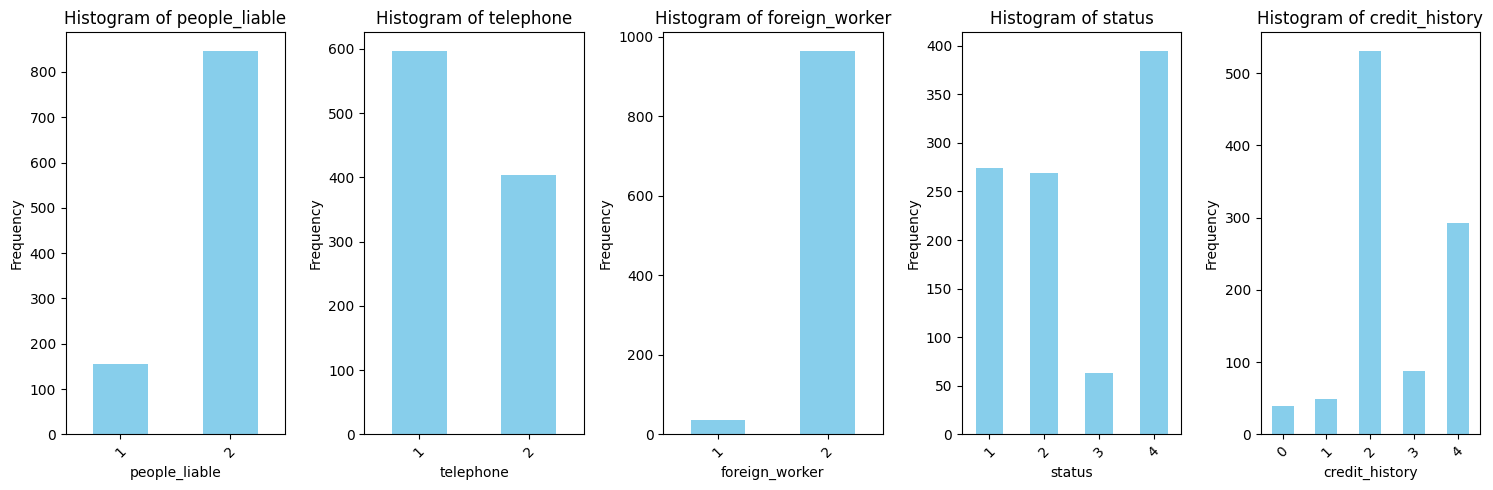

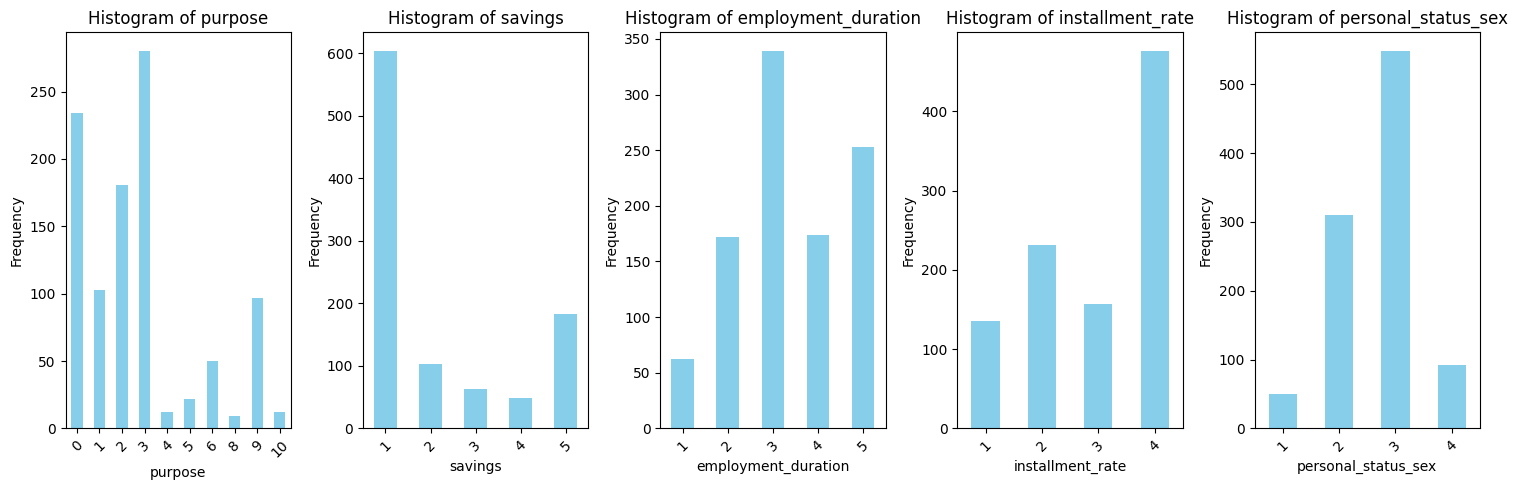

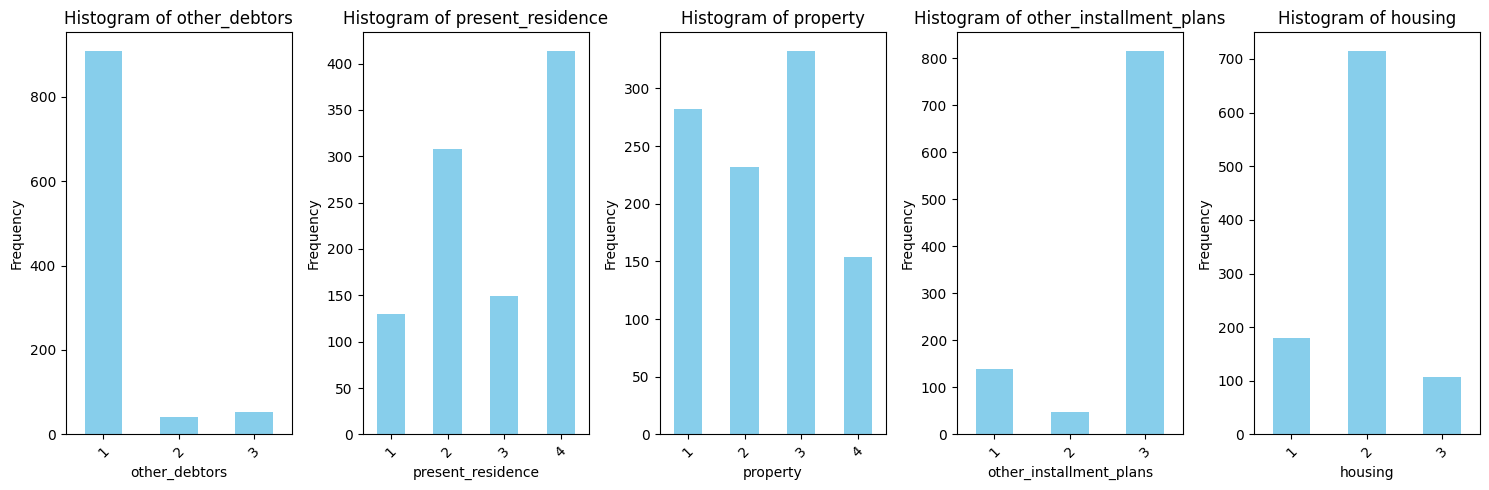

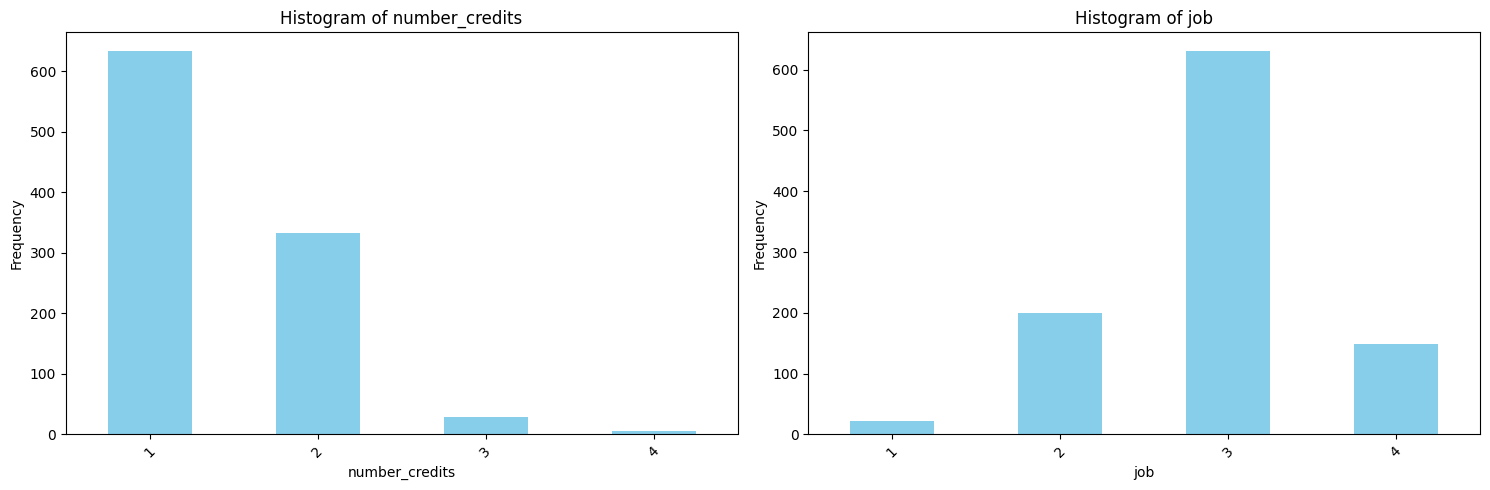

In [510]:
cat_columns=categorical_columns_to_keep+categorical_columns_to_trasnf
# Determine number of rows needed

num_plots = len(cat_columns)
num_rows = (num_plots - 1) // 5 + 1  # Number of full rows needed

# Generate histograms for categorical columns
for i in range(num_rows):
    start_index = i * 5
    end_index = min((i + 1) * 5, num_plots)

    fig, axes = plt.subplots(1, end_index - start_index, figsize=(15, 5))
    for j, column in enumerate(cat_columns[start_index:end_index]):
        df[column].value_counts().sort_index().plot(kind='bar', ax=axes[j], color='skyblue')
        axes[j].set_title(f'Histogram of {column}')
        axes[j].set_xlabel(column)
        axes[j].set_ylabel('Frequency')
        axes[j].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

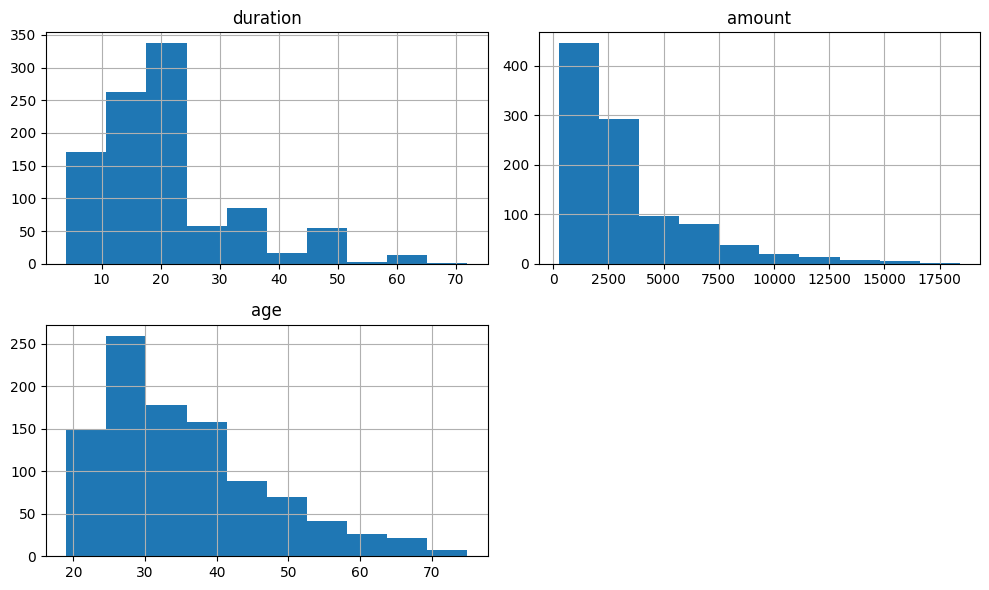

In [511]:
# Generate histograms for numerical columns
df[numerical_columns].hist(figsize=(10, 6), bins=10)
plt.tight_layout()
plt.show()


### **Describe y explica a continuación las transformaciones que has decidido aplicar a cada columna:**

### ++++++++ Inicia la sección de agregar texto: +++++++++++


1 . Variable: status - OrdinalEncoder

2 . Variable: credit_history - OrdinalEncoder

3 . Variable: purpose - OrdinalEncoder

4 . Variable: savings - OrdinalEncoder

5 . Variable: employment_duration - OrdinalEncoder

6 . Variable: installment_rate - OrdinalEncoder

7 . Variable: personal_status_sex - OrdinalEncoder

8 . Variable: other_debtors - OrdinalEncoder

9 . Variable: present_residence - OrdinalEncoder

10 . Variable: property - OrdinalEncoder

11 . Variable: other_installment_plans - OrdinalEncoder

12 . Variable: housing - OrdinalEncoder

13 . Variable: number_credits - OrdinalEncoder

14 . Variable: job - OrdinalEncoder

15 . Variable: people_liable - no transformation

16 . Variable: telephone - no transformation

17 . Variable: foreign_worker - no transformation

18 . Variable: credit_risk - no transformation

19 . Variable: duration - Scaling

20 . Variable: amount - Scaling

21 . Variable: age - Scaling

### ++++++++ Termina la sección de agregar texto. +++++++++++


# **Parte II: Modelos de aprendizaje automático con los conjuntos originales de la partición realizada.**

## **Ejercicio 6**

In [512]:
categorical_columns_to_trasnf ## variables for ordinal encoding
print("Vairables numericas a transformar =",len(num_columns),"\n",num_columns,"\n")
print("Vairables categoricas a transformar =",len(categorical_columns_to_trasnf),"\n",categorical_columns_to_trasnf,"\n")
print("Vairables categoricas que no se van a  transformar, pues son binarias =",len(categorical_columns_to_keep),"\n",categorical_columns_to_keep,"\n")

Vairables numericas a transformar = 3 
 ['duration', 'amount', 'age'] 

Vairables categoricas a transformar = 14 
 ['status', 'credit_history', 'purpose', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'other_installment_plans', 'housing', 'number_credits', 'job'] 

Vairables categoricas que no se van a  transformar, pues son binarias = 3 
 ['people_liable', 'telephone', 'foreign_worker'] 



In [513]:
# Transformaciones que se aplicarán a las variables numéricas usando la clase Pipeline de sklearn:

# ************* Inlcuye aquí tu código:*****************************

#----------------------------------------------------------------------------
# Define the features that require ordinal encoding and scaling
numeric_features = num_columns  # Define this based on your actual dataset
categorical_features = categorical_columns_to_trasnf  # Define this based on your actual dataset

# Define ordinal encoder and scaler
encoder = OrdinalEncoder()
scaler = MinMaxScaler()

# Define preprocessing steps for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', scaler)  # Only scaling is needed for numerical features
])

categorical_transformer = Pipeline(steps=[
    ('encoder', encoder)  # No need for imputation when using ordinal encoder
])

# Combine preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'  # Leave unspecified columns untouched
)


# Variables numéricas:
num_pipe = numeric_transformer
num_pipe_nombres = numeric_features


# Variables categóricas:

cat_pipe = categorical_transformer
cat_pipe_nombres = categorical_features


# Conjuntemos las transformaciones de todo tipo de variable y en dado caso
# deja inaletardas aquellas que hayas decidido no transformar:

columnasTransformer = preprocessor

# *********** Aquí termina la sección de agregar código *************

## **Ejercicio 7**

In [514]:
# Como se va a utilizar Validación-Cruzada, concatena los conjuntos de entrenamiento y validación
# en uno nuevo aumentado que llamaremos trainval para utilizar como entrenamiento:

# ************* Inlcuye aquí tu código:**************************

Xtrainval = pd.concat([Xtrain, Xval], axis=0)
ytrainval = pd.concat([ytrain, yval], axis=0)

# *********** Aquí termina la sección de agregar código *************


print(Xtrainval.shape, ytrainval.shape)

(850, 20) (850,)


## **Ejercicio 8**

In [515]:
# Definimos a continuación la función que llamamos "mis_modelos" que incluye
# todos los modelos que deseamos comparar en el ejercicio.
# Por el momento todas tienen sus argumentos predeterminados, pero deberás
# ajustarlos de manera que todos los modelos converjan durante el entrenamiento
# y puedas comparar cuál o cuáles de ellos son los mejores modelos.

def mis_modelos():
  modelos, nombres = list(), list()


  # ************* Inlcuye aquí tu código:**************************
  #
  # Deberás incluir en cada modelo los argumentos que consideres
  # adecuados para que cada uno converja. En dado caso una decisión
  # puede ser que un modelo tenga simplemente los valores de sus
  # hiperparámetros con los predeterminados.
  # Consulta en dado caso la documentación de cada modelo para
  # la identificación de los hiperparámetros que desees ajustar.


  # Regresión Logística:
  modelos.append(LogisticRegression(max_iter=1000))
  nombres.append('LR')

  # k-Vecinos más Cercanos:
  modelos.append(KNeighborsClassifier(n_neighbors=5))
  nombres.append('kNN')

  # Árbol de decisiones:
  modelos.append(DecisionTreeClassifier(max_depth=5))
  nombres.append('DTree')

  # Bosque Aleatorio:
  modelos.append(RandomForestClassifier(n_estimators=100))
  nombres.append('RF')

  # XGBoosting:
  modelos.append(XGBClassifier(n_estimators=100))
  nombres.append('XGBoost')

  # Red neuronal de Perceptrón Multicapa:
  modelos.append(MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000))
  nombres.append('MLP')

  # Máquina de Vectores de Soporte:
  modelos.append(SVC(kernel='linear'))
  nombres.append('SVM')

  # *********** Aquí termina la sección de agregar código *************

  return modelos, nombres




In [516]:
# Entrenemos cada uno de los modelos y desplegamos la métricas de Train y Val.

# NOTA: Observa que el método de Validación-Cruzada llama  a los resultados
#       de "validation" como "test":

modelos, nombres = mis_modelos()
resultados = list()

for i in range(len(modelos)):

  # Definimos nuestro pipeline con las transformaciones y los modelos:
  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  # Aplicaremos validación-cruzada:
  micv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

  # Definimos las métricas que desamos recuperar:
  mismetricas = {'accuracy','precision','recall','f1','roc_auc'}

  # Llevamos a cabo el entrenamiento:
  scores = cross_validate(pipeline,
                          Xtrainval,
                          ytrainval,
                          scoring=mismetricas,
                          cv=micv,
                          return_train_score=True,
                          )

  # Guardemos el resultado de cada modelopara análisis posteriores.
  resultados.append(scores)

  # Desplegamos los valores de las métricas para verificar si no hay
  # subentrenamiento o sobreentrenamiento:
  print('>> %s' % nombres[i])
  for j,k in enumerate(list(scores.keys())):
    if j>1:
      print('\t %s %.3f (%.3f)' % (k, np.mean(scores[k]),np.std(scores[k])))

import warnings
warnings.filterwarnings('ignore')

>> LR
	 test_precision 0.795 (0.018)
	 train_precision 0.806 (0.009)
	 test_accuracy 0.755 (0.029)
	 train_accuracy 0.777 (0.010)
	 test_f1 0.838 (0.020)
	 train_f1 0.853 (0.006)
	 test_recall 0.886 (0.032)
	 train_recall 0.905 (0.007)
	 test_roc_auc 0.770 (0.040)
	 train_roc_auc 0.801 (0.009)
>> kNN
	 test_precision 0.783 (0.019)
	 train_precision 0.828 (0.006)
	 test_accuracy 0.742 (0.030)
	 train_accuracy 0.809 (0.008)
	 test_f1 0.831 (0.021)
	 train_f1 0.874 (0.005)
	 test_recall 0.885 (0.035)
	 train_recall 0.924 (0.008)
	 test_roc_auc 0.723 (0.034)
	 train_roc_auc 0.873 (0.007)
>> DTree
	 test_precision 0.780 (0.030)
	 train_precision 0.830 (0.024)
	 test_accuracy 0.720 (0.035)
	 train_accuracy 0.806 (0.009)
	 test_f1 0.812 (0.028)
	 train_f1 0.871 (0.011)
	 test_recall 0.851 (0.062)
	 train_recall 0.919 (0.049)
	 test_roc_auc 0.698 (0.041)
	 train_roc_auc 0.846 (0.013)
>> RF
	 test_precision 0.794 (0.011)
	 train_precision 1.000 (0.000)
	 test_accuracy 0.773 (0.017)
	 train_accu

In [517]:

for model, name in zip(modelos, nombres):
    # Train the model
    model.fit(Xtrainval, ytrainval)

    # Predictions on training and validation sets
    y_train_pred = model.predict(Xtrainval)
    y_val_pred = model.predict(Xval)

    # Calculate accuracy on training and validation sets
    train_accuracy = accuracy_score(ytrainval, y_train_pred)
    val_accuracy = accuracy_score(yval, y_val_pred)

    # Confusion matrix and classification report for the validation set
    val_conf_matrix = confusion_matrix(yval, y_val_pred)
    val_classification_report = classification_report(yval, y_val_pred)

    # Print the requested information
    print(f"Model: {name}")
    print("Exactitud en el conjunto de entrenamiento:", train_accuracy)
    print("Exactitud en el conjunto de validación:", val_accuracy)
    print("Matriz de Confusión (Validación):\n", val_conf_matrix)
    print("\nReporte de Clasificación (Validación):\n", val_classification_report)
    print("\n----------------------------------------------------\n")

Model: LR
Exactitud en el conjunto de entrenamiento: 0.7658823529411765
Exactitud en el conjunto de validación: 0.78
Matriz de Confusión (Validación):
 [[18 25]
 [ 8 99]]

Reporte de Clasificación (Validación):
               precision    recall  f1-score   support

           0       0.69      0.42      0.52        43
           1       0.80      0.93      0.86       107

    accuracy                           0.78       150
   macro avg       0.75      0.67      0.69       150
weighted avg       0.77      0.78      0.76       150


----------------------------------------------------

Model: kNN
Exactitud en el conjunto de entrenamiento: 0.7611764705882353
Exactitud en el conjunto de validación: 0.7533333333333333
Matriz de Confusión (Validación):
 [[15 28]
 [ 9 98]]

Reporte de Clasificación (Validación):
               precision    recall  f1-score   support

           0       0.62      0.35      0.45        43
           1       0.78      0.92      0.84       107

    accuracy   

## **Ejercicio 9**

### **De acuerdo a la información de la matriz de costo dada en la documentación del problema, contesta las siguientes preguntas:**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

###clase negativa (buen cliente) - Credit risk = 0
###Clase positiva (mal cliente) - Credit risk = 1

#a.   ¿Qué error se considera más costoso por parte del banco? ¿FP o FN? Justifica tu respuesta.

###Un falso negativo ocurre cuando el modelo predice incorrectamente que un cliente es de bajo riesgo (clase 0), pero en realidad es de alto riesgo (clase 1).

###Esto significa que el banco otorgaría crédito a un cliente de alto riesgo, lo que podría resultar en incumplimientos y pérdidas financieras significativas.

###Por lo tanto cometer un falso negativo (FN) sería más costoso para el banco.

#b.   ¿Cuál o cuál serían entonces las métricas a considerar como más importantes? Justifica tu respuesta.

###Dado que los falsos negativos son más costosos, las métricas de evaluación más importantes serían aquellas que minimicen este tipo de error

###La métrica más relevante sería la sensibilidad (recall), que mide la proporción de casos positivos reales que se identifican correctamente.

###La precisión (precision) también sería importante, ya que indica la proporción de predicciones positivas que son correctas entre todas las predicciones positivas realizadas.

#c.   Investiga qué otras métricas se pudieran considerar, de la gran familia de métricas que existen.

###Especificidad: Mide la proporción de casos negativos reales que se identifican correctamente como tales.

###Puntaje F1: Es una medida de precisión ponderada y sensibilidad, útil cuando hay un desequilibrio entre las clases.

###Exactitud (Accuracy): Mide la proporción de predicciones correctas en general, pero puede ser engañosa en presencia de clases desbalanceadas.

###Puntaje ROC-AUC: Mide el área bajo la curva ROC, que representa la capacidad del modelo para distinguir entre las clases positiva y negativa. Una puntuación más alta indica un mejor rendimiento del modelo.


### ++++++++ Termina la sección de agregar texto. +++++++++++


## **Ejercicio 10**

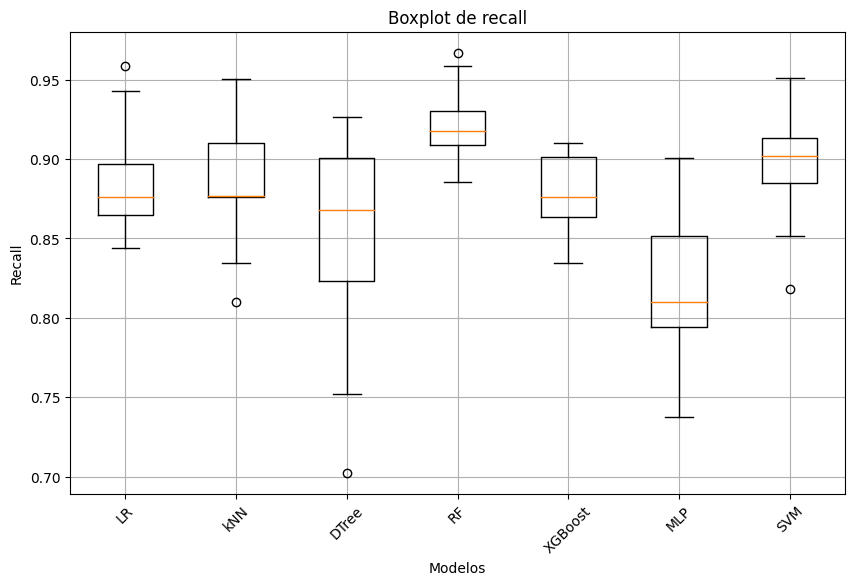

In [518]:
# Obtener un diagrama de caja y bigotes (boxplot) múltiple de todos los modelos,
# utilizando los resultados obtenidos con la métrica que consideraste más importante
# en el ejercicio anterior:


# ************* Inlcuye aquí tu código:**************************

# Lista para almacenar los resultados de la métrica importante de cada modelo
metricas_importantes = []

# Obtener la métrica importante de cada modelo
for score in resultados:
    # Aquí debes especificar el nombre de la métrica importante, por ejemplo, 'recall'
    metrica_importante = score['test_recall']
    metricas_importantes.append(metrica_importante)

# Crear el diagrama de caja y bigotes múltiple
plt.figure(figsize=(10, 6))
plt.boxplot(metricas_importantes, labels=nombres)
plt.title('Boxplot de recall')
plt.xlabel('Modelos')
plt.ylabel('Recall')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# *********** Aquí termina la sección de agregar código *************


# **Parte III: Modelos con técnicas para clases no balanceadas.**

## **Ejercicio 11**

In [519]:
# Selecciona una técnica de sobremuestreo, submuestreo o sobremuestreo+submuestreo para
# clases no balanceadas que consideres adecuada, en combinación con los tres mejores modelos
# de la Parte II, para entrenar y desplegar todas las métricas que se desplegaron en la Parte II.

# ************* Inlcuye aquí tu código:**************************

# Define the names of the models you want to use
selected_model_names = ['LR', 'kNN', 'DTree']

# Get all models and their names
modelos, nombres = mis_modelos()

# Filter models and names based on the selected names
selected_modelos = [modelos[nombres.index(name)] for name in selected_model_names]
selected_nombres = selected_model_names

# Selecciona la técnica de sobremuestreo y submuestreo combinados
sampler = SMOTETomek(sampling_strategy=0.5)  # Ejemplo de sobremuestreo + submuestreo

# Crea un pipeline para cada modelo con la técnica de muestreo
pipelines = []
for modelo in selected_modelos:
    pipeline = Pipeline(steps=[('sampler', sampler), ('m', modelo)])
    pipelines.append(pipeline)

# Entrena y evalúa cada modelo con todas las métricas relevantes
for i, pipeline in enumerate(pipelines):
    pipeline.fit(Xtrain, ytrain)
    y_pred = pipeline.predict(Xtest)
    print("Modelo:", selected_nombres[i])
    print(classification_report(ytest, y_pred))
    print("Matriz de Confusión:")
    print(confusion_matrix(ytest, y_pred))


# *********** Aquí termina la sección de agregar código *************

Modelo: LR
              precision    recall  f1-score   support

           0       0.82      0.49      0.62        57
           1       0.75      0.94      0.83        93

    accuracy                           0.77       150
   macro avg       0.79      0.71      0.72       150
weighted avg       0.78      0.77      0.75       150

Matriz de Confusión:
[[28 29]
 [ 6 87]]
Modelo: kNN
              precision    recall  f1-score   support

           0       0.40      0.21      0.28        57
           1       0.62      0.81      0.70        93

    accuracy                           0.58       150
   macro avg       0.51      0.51      0.49       150
weighted avg       0.54      0.58      0.54       150

Matriz de Confusión:
[[12 45]
 [18 75]]
Modelo: DTree
              precision    recall  f1-score   support

           0       0.65      0.42      0.51        57
           1       0.71      0.86      0.78        93

    accuracy                           0.69       150
   macro av

# **Parte IV: Mejor modelo**

## **Ejercicio 12**

### **Selecciona y justifica cuál consideras es el mejor modelo que has obtenido hasta ahora.**
### ++++++++ Inicia  la sección de agregar texto. +++++++++++

### Considero que el mejor modelo hasta ahora es la Regresión Logística (LR) debido a que queremos minimizar los falsos negativos (FN) y garantizar que identificamos la mayor cantidad posible de casos positivos reales, podemos observar que el modelo de Regresión Logística (LR) tiene el recall más alto de todos los modelos evaluados (0.92). Esto significa que LR tiene la mejor capacidad entre los tres modelos para identificar verdaderos positivos en comparación con los falsos negativos.



### ++++++++ Termina la sección de agregar texto. +++++++++++


## **Ejercicio 13**

In [520]:
# Con dicho mejor modelo y utilizando la técnica de validación cruzada, busca
# los mejores hiperparámetros de dicho modelo y despliega todas las métricas que
#se han estado desplegando. Verifica que tu modelo no esté sobreentrenado e indica
# cuáles son los mejores valores obtenidos de los hiperparámetros.


# ************* Inlcuye aquí tu código:**************************

# Define the parameters to tune in the grid search
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Initialize the logistic regression model
lr_model = LogisticRegression(max_iter=1000)

# Initialize the grid search
grid_search = GridSearchCV(lr_model, param_grid, cv=5, scoring='recall')

# Perform grid search on the training data
grid_search.fit(Xtrain, ytrain)

# Get the best hyperparameters found
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the model with the best hyperparameters using cross-validation
cv_results = cross_validate(grid_search.best_estimator_, Xtrain, ytrain, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

# Display all relevant metrics
print("Average Metrics with Cross-Validation:")
for metric in cv_results.keys():
    print(metric, ":", np.mean(cv_results[metric]))

# Evaluate the model on the test set
y_pred_test = grid_search.best_estimator_.predict(Xtest)
print("\nClassification Report on Test Set:")
print(classification_report(ytest, y_pred_test))

# Display the confusion matrix on the test set
print("Confusion Matrix on Test Set:")
print(confusion_matrix(ytest, y_pred_test))

# *********** Aquí termina la sección de agregar código *************


Best Hyperparameters: {'C': 0.001, 'penalty': 'l2'}
Average Metrics with Cross-Validation:
fit_time : 0.03211207389831543
score_time : 0.01489715576171875
test_accuracy : 0.7242857142857143
test_precision : 0.7280585902860751
test_recall : 0.9799999999999999
test_f1 : 0.8354367195299917
test_roc_auc : 0.6901499999999998

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.67      0.07      0.13        57
           1       0.63      0.98      0.77        93

    accuracy                           0.63       150
   macro avg       0.65      0.52      0.45       150
weighted avg       0.65      0.63      0.52       150

Confusion Matrix on Test Set:
[[ 4 53]
 [ 2 91]]


## **Ejercicio 14**

In [521]:
# 14.	Con el mejor modelo y los mejores hiperparámetros encontrados en el ejercicio anterior,
# utiliza ahora (por primera vez en la actividad) el conjunto de prueba (test set) para:

# a.	Obtener los valores de todas las métricas que se han estado desplegando.

# ************* Inlcuye aquí tu código:**************************
# Initialize the logistic regression model with the best hyperparameters
best_lr_model = LogisticRegression(C=0.001, penalty='l2', max_iter=1000)

# Fit the model with the training data
best_lr_model.fit(Xtrain, ytrain)

# Predict the target values for the test set
y_pred_test = best_lr_model.predict(Xtest)

# Calculate metrics
accuracy = accuracy_score(ytest, y_pred_test)
precision = precision_score(ytest, y_pred_test)
recall = recall_score(ytest, y_pred_test)
f1 = f1_score(ytest, y_pred_test)
roc_auc = roc_auc_score(ytest, y_pred_test)
conf_matrix = confusion_matrix(ytest, y_pred_test)

# Display the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

print("\nConfusion Matrix:\n", conf_matrix)

# *********** Aquí termina la sección de agregar código *************


Accuracy: 0.6333333333333333
Precision: 0.6319444444444444
Recall: 0.978494623655914
F1 Score: 0.7679324894514769
ROC AUC Score: 0.5243350311262026

Confusion Matrix:
 [[ 4 53]
 [ 2 91]]


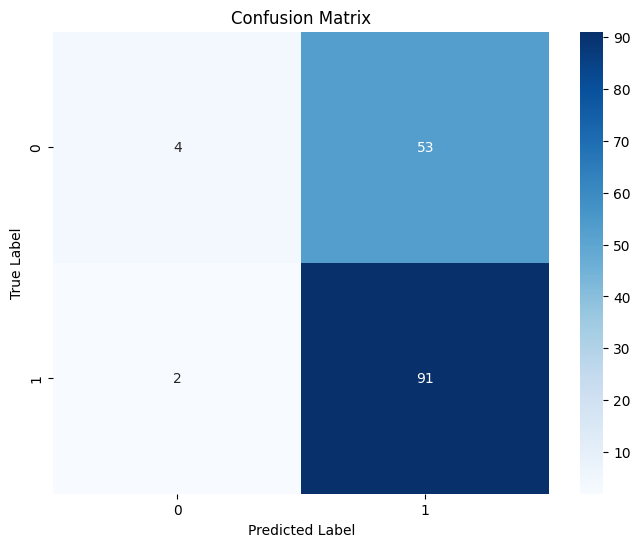

In [522]:
# b.	Obtener la matriz de confusión.

# ************* Inlcuye aquí tu código:**************************
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# *********** Aquí termina la sección de agregar código *************

In [523]:
# c.	Realiza un análisis de importancia de variables (feature importance) de este
# mejor modelo con el conjunto de prueba (test) e incluye tus conclusiones al respecto.

# ************* Inlcuye aquí tu código:**************************
feature_importance = best_lr_model.coef_[0]

# Pair the feature names with their importance scores
feature_importance_dict = dict(zip(Xtrain.columns, feature_importance))

# Sort the feature importances in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the feature importances
for feature, importance in sorted_feature_importance:
    print(f"Feature: {feature}, Importance: {importance}")

# *********** Aquí termina la sección de agregar código *************

Feature: status, Importance: 0.10076355745984963
Feature: savings, Importance: 0.06012057088898681
Feature: credit_history, Importance: 0.04999890570828057
Feature: employment_duration, Importance: 0.03911379204753807
Feature: age, Importance: 0.024294217738568928
Feature: other_installment_plans, Importance: 0.024121997116620206
Feature: personal_status_sex, Importance: 0.022836948065163617
Feature: purpose, Importance: 0.01875000616884478
Feature: telephone, Importance: 0.010261971776599939
Feature: number_credits, Importance: 0.00992325180980888
Feature: job, Importance: 0.009589828579106292
Feature: other_debtors, Importance: 0.006453573534864655
Feature: people_liable, Importance: 0.005815481387512516
Feature: housing, Importance: 0.0053853134782359995
Feature: foreign_worker, Importance: 0.0007956358112785538
Feature: amount, Importance: -1.4209836501971427e-06
Feature: present_residence, Importance: -0.0077700514387266965
Feature: property, Importance: -0.020889196030965396
Feat

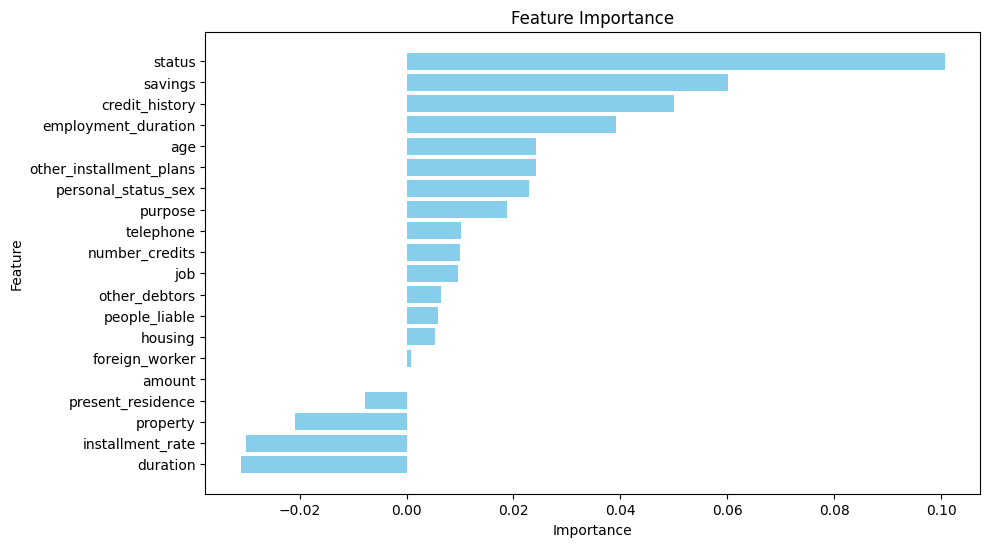

In [524]:
import matplotlib.pyplot as plt

# Extract feature names and importances
features = [feature for feature, _ in sorted_feature_importance]
importances = [importance for _, importance in sorted_feature_importance]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display highest importance at the top
plt.show()

## **Ejercicio 15**

### **Escribe tus conclusiones finales de la actividad. En particular puedes comparar tus resultados con los que se muestran en el artículo de la IEEE.**   

### ++++++++ Inicia la sección de agregar texto: +++++++++++

##El modelo entrenado se ha enfocado en optimizar el recall obteniendo el 97.85%, lo que indica que el modelo identifica correctamente el 97.85% de todos los casos positivos presentes en el conjunto de prueba. Lo cual es sumamente importante para implementar este tipo de modelos para reducir el riesgo de perdidas economicas al detectar el 97.85% de las veces los casos en los que los clientes podrian presentar comportamientos de riesgo lo cual podria deribar en impago.

##Basado en "An Investigation of Credit Card Default Prediction in the Imbalanced Datasets", efectivamente es de suma importancia para las instituciones bancarias realizar predicciones correctas acerca de clientes con alto riesgo de impago. El incremento sobre la exactitud de la identificación podria prevenir perdidas más de 8 billones de dolares.

##A pesar de que en el articulo se menciona que el modelo con mayor performance que se encontro durante el desarrollo de este proyecto fue: Gradient Boosting Decision Tree, el cual no fue implementado directamente en esta practica, los objetivos buscados atraves de la realización de este codigo fueron los mismos, incrementar la exactitud de predicciónes acerca de clientes con riesgo.

#Fuentes:

 #Alam, T. M., Shaukat, K., Hameed, I. A., Luo, S., Sarwar, M. U., Shabbir, S., Li, J., & Khushi,
 #M. (2020). An investigation of credit card default prediction in the imbalanced datasets.
 #IEEE Access: Practical Innovations, Open Solutions, 8, 201173–201198.
 #https://doi.org/10.1109/access.2020.3033784

### ++++++++ Termina la sección de agregar texto. +++++++++++


>> ###**Fin de la Actividad de las Semanas 5 y 6.**